Found 144000 images belonging to 2 classes.
Found 144000 images belonging to 2 classes.
Found 144000 images belonging to 2 classes.
Found 144000 images belonging to 2 classes.
Found 144000 images belonging to 2 classes.


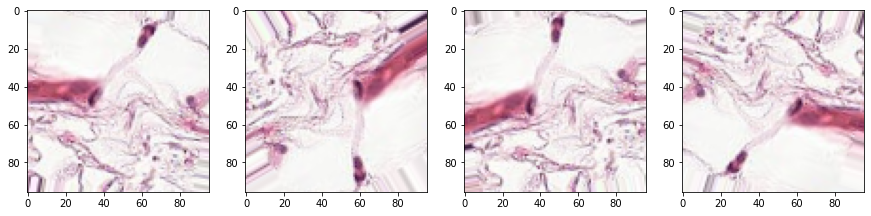

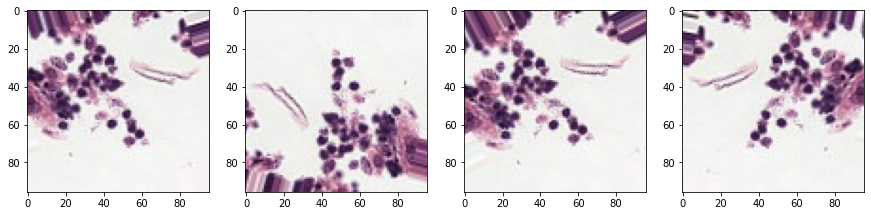

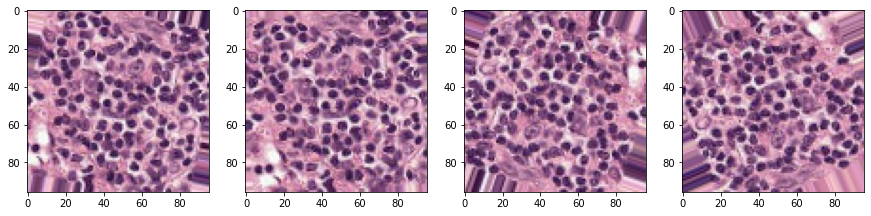

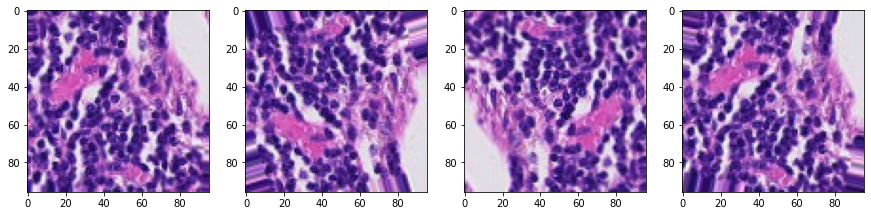

In [10]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 17 15:37:27 2022

@author: 20191819
"""
# disable overly verbose tensorflow logging
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}   
#import tensorflow as tf

#import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Flatten, RandomFlip, RandomRotation
#from tensorflow.keras.layers import Conv2D, MaxPool2D
#from tensorflow.keras.optimizers import SGD
#from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
# unused for now, to be used for ROC analysis
#from sklearn.metrics import roc_curve, auc
#import cv2

# the size of the images in the PCAM dataset
IMAGE_SIZE = 96

def get_pcam_generators(base_dir, train_batch_size, val_batch_size=32):

      # dataset parameters
      train_path = os.path.join(base_dir, 'train+val', 'train')
      #valid_path = os.path.join(base_dir, 'train+val', 'valid')


      RESCALING_FACTOR = 1./255

      # instantiate data generators
      datagen = ImageDataGenerator(rescale=RESCALING_FACTOR,rotation_range=30,horizontal_flip=True, vertical_flip=True, fill_mode='nearest')
      train_gen1 = datagen.flow_from_directory(train_path,
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=train_batch_size,
                                               class_mode='binary',shuffle=False)
      # datagen = ImageDataGenerator(rescale=RESCALING_FACTOR,rotation_range=30,horizontal_flip=True, vertical_flip=True, fill_mode='nearest')
      train_gen2 = datagen.flow_from_directory(train_path,
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=train_batch_size,
                                               class_mode='binary',shuffle=False)
      # datagen = ImageDataGenerator(rescale=RESCALING_FACTOR,rotation_range=30,horizontal_flip=True, vertical_flip=True, fill_mode='nearest')
      train_gen3 = datagen.flow_from_directory(train_path,
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=train_batch_size,
                                               class_mode='binary',shuffle=False)

      # datagen = ImageDataGenerator(rescale=RESCALING_FACTOR,rotation_range=30,horizontal_flip=True, vertical_flip=True, fill_mode='nearest')
      train_gen4 = datagen.flow_from_directory(train_path,
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=train_batch_size,
                                               class_mode='binary',shuffle=False)
         
      
      
       # NB: first SHUFFLE = FALSE was not specified in the val_gen definition
       # This was however specified in the code in the jupyter notebook
       # This was the reason for the odd ROC curves


      
      return train_gen1, train_gen2, train_gen3, train_gen4
  
    
    
def get_pcam_generators2(base_dir, train_batch_size, val_batch_size=32):

      # dataset parameters
      train_path = os.path.join(base_dir, 'train+val', 'train')
      #valid_path = os.path.join(base_dir, 'train+val', 'valid')


      RESCALING_FACTOR = 1./255

      # instantiate data generators
      datagen = ImageDataGenerator(rescale=RESCALING_FACTOR,rotation_range=30,horizontal_flip=True, vertical_flip=True, fill_mode='nearest')
      train_gen1 = datagen.flow_from_directory(train_path,
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=train_batch_size,
                                               class_mode='binary',shuffle=False)
      
      
       # NB: first SHUFFLE = FALSE was not specified in the val_gen definition
       # This was however specified in the code in the jupyter notebook
       # This was the reason for the odd ROC curves


      
      return train_gen1
 
# get the data generators

iter_size = 4 #how many times the augmentation takes place
batch_size = 35 #size of the batches (more relevant for the model itself I think?)

#[train_gen1, train_gen2, train_gen3, train_gen4] = get_pcam_generators(r'C:\Users\20191819\Documents\school\2021,2022\Q3\ProjectBIA\data', batch_size)  #Lieke
[train_gen1, train_gen2, train_gen3, train_gen4] = get_pcam_generators(r'C:\Users\20192823\Documents\3 jaar\Kwartiel 3\BIA', batch_size)  #Jim
train_gen1 = get_pcam_generators2(r'C:\Users\20192823\Documents\3 jaar\Kwartiel 3\BIA', batch_size)
#first 9000 of training set (0) last 9000 of training set (1)
#validation set remains the same

#visualisation of the data augmentation
for j in range(iter_size):
    fig, ax = plt.subplots(nrows=1, ncols=iter_size, figsize=(15,15))
    img = train_gen1[j][0][0]
    ax[0].imshow(img)
    img = train_gen2[j][0][0]
    ax[1].imshow(img)
    img = train_gen3[j][0][0]
    ax[2].imshow(img)
    img = train_gen4[j][0][0]
    ax[3].imshow(img)

In [25]:
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 17 15:37:27 2022

@author: 20191819
"""
# disable overly verbose tensorflow logging
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}   
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Flatten, RandomFlip, RandomRotation
#from tensorflow.keras.layers import Conv2D, MaxPool2D
#from tensorflow.keras.optimizers import SGD
#from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
# unused for now, to be used for ROC analysis
#from sklearn.metrics import roc_curve, auc
#import cv2
import tensorflow_datasets as tfds






# the size of the images in the PCAM dataset
IMAGE_SIZE = 96

def get_pcam_generators(base_dir, train_batch_size, val_batch_size=32):

      # dataset parameters
      train_path = os.path.join(base_dir, 'train+val', 'train')
      #valid_path = os.path.join(base_dir, 'train+val', 'valid')


      RESCALING_FACTOR = 1./255

      # instantiate data generators
      datagen = ImageDataGenerator(rescale=RESCALING_FACTOR,rotation_range=90,horizontal_flip=True, vertical_flip=True, fill_mode='nearest')
      train_gen1 = datagen.flow_from_directory(train_path,
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=train_batch_size,
                                               class_mode='binary',shuffle=False)
      # datagen = ImageDataGenerator(rescale=RESCALING_FACTOR,rotation_range=30,horizontal_flip=True, vertical_flip=True, fill_mode='nearest')
      train_gen2 = datagen.flow_from_directory(train_path,
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=train_batch_size,
                                               class_mode='binary',shuffle=False)
      # datagen = ImageDataGenerator(rescale=RESCALING_FACTOR,rotation_range=30,horizontal_flip=True, vertical_flip=True, fill_mode='nearest')
      train_gen3 = datagen.flow_from_directory(train_path,
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=train_batch_size,
                                               class_mode='binary',shuffle=False)

      # datagen = ImageDataGenerator(rescale=RESCALING_FACTOR,rotation_range=30,horizontal_flip=True, vertical_flip=True, fill_mode='nearest')
      train_gen4 = datagen.flow_from_directory(train_path,
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=train_batch_size,
                                               class_mode='binary',shuffle=False)
         
      
      
       # NB: first SHUFFLE = FALSE was not specified in the val_gen definition
       # This was however specified in the code in the jupyter notebook
       # This was the reason for the odd ROC curves


      
      return train_gen1, train_gen2, train_gen3, train_gen4
  
    
    
def get_pcam_generators2(base_dir, train_batch_size, val_batch_size=32):

      # dataset parameters
      train_path = os.path.join(base_dir, 'train+val', 'train')
      #valid_path = os.path.join(base_dir, 'train+val', 'valid')


      RESCALING_FACTOR = 1./255

      # instantiate data generators
      datagen = ImageDataGenerator(rescale=RESCALING_FACTOR,rotation_range=90,horizontal_flip=True, vertical_flip=True, fill_mode='nearest')
      train_gen1 = datagen.flow_from_directory(train_path,
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=train_batch_size,
                                               class_mode='binary',shuffle=False)
      
       # NB: first SHUFFLE = FALSE was not specified in the val_gen definition
       # This was however specified in the code in the jupyter notebook
       # This was the reason for the odd ROC curves
      
      return train_gen1
 
# get the data generators

iter_size = 2 #how many times the augmentation takes place
batch_size = 3 #size of the batches (more relevant for the model itself I think?)

#[train_gen1, train_gen2, train_gen3, train_gen4] = get_pcam_generators(r'C:\Users\20191819\Documents\school\2021,2022\Q3\ProjectBIA\data', batch_size)  #Lieke
#[train_gen1, train_gen2, train_gen3, train_gen4] = get_pcam_generators(r'C:\Users\20192823\Documents\3 jaar\Kwartiel 3\BIA', batch_size)  #Jim
train_gen1 = get_pcam_generators2(r'C:\Users\20192823\Documents\3 jaar\Kwartiel 3\BIA', batch_size)
#first 9000 of training set (0) last 9000 of training set (1)
#validation set remains the same


split0, split1, split2, split3 = tfds.even_splits('train_gen1', n=4)
type(split0)


#visualisation of the data augmentation
splice = 3
for j in range(splice):
    fig, ax = plt.subplots(nrows=1, ncols=iter_size, figsize=(15,15))
    img = train_gen1[j][0][0]
    ax[0].imshow(img)
 

Found 144000 images belonging to 2 classes.


AttributeError: module 'tensorflow_datasets' has no attribute 'even_splits'